In [1]:
# Core Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from portfolio_optimizer import portfolio_optimizer
from backtest import backtest, display_backtest_results
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
from typing import List

# data used to replicate paper results
# VTI, AGG, DBC, VIX
start_date = "2010-01-01"
end_date = "2020-01-01"
price_long = pd.read_csv("data_clean/long_format_daily_original_paper_data.csv")
price_long["Date"] = pd.to_datetime(price_long["Date"])
price_long = price_long.loc[(price_long["Date"] >= start_date) & (price_long["Date"] <= end_date), :]
price_wide = price_long.pivot(index='Date', columns='Ticker', values='Price')

portfolio_paper = portfolio_optimizer(price_long)

# Replicate Paper Result

In [2]:
%%time

# ORIGINAL LSTM
tf.keras.utils.set_random_seed(100)
weight_LSTM = portfolio_paper.optimize("LSTM")

1/1 [==============================] - 0s 206ms/step
successfully optimized portfolio weights
CPU times: total: 6.56 s
Wall time: 16.5 s


In [3]:
# static allocations
weight_alloc_1 = weight_LSTM.copy()
weight_alloc_2 = weight_LSTM.copy()
weight_alloc_3 = weight_LSTM.copy()
weight_alloc_4 = weight_LSTM.copy()
weight_alloc_1["Weight"] = 1/4
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "VTI", "Weight"] = 1/2
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "AGG", "Weight"] = 1/10
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "DBC", "Weight"] = 1/5
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "VIX", "Weight"] = 1/5
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "VTI", "Weight"] = 1/10
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "AGG", "Weight"] = 1/2
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "DBC", "Weight"] = 1/5
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "VIX", "Weight"] = 1/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "VTI", "Weight"] = 2/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "AGG", "Weight"] = 2/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "DBC", "Weight"] = 1/10
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "VIX", "Weight"] = 1/10

# benchmarks
weight_variance = portfolio_paper.optimize("variance", period = 252)
weight_sharpe = portfolio_paper.optimize("sharpe", period = 252)
weight_markowitz3 = portfolio_paper.optimize("markowitz3", period = 252)
weight_DR = portfolio_paper.optimize("divers_ratio", period = 252)
weight_MRC = portfolio_paper.optimize("marginal_risk_contribution", period = 252)

successfully optimized portfolio weights
successfully optimized portfolio weights
successfully optimized portfolio weights
successfully optimized portfolio weights
successfully optimized portfolio weights


,Allocation 1,Allocation 2,Allocation 3,Allocation 4,minVar,maxSharpe,Markowitz 3.0,maxDR,minMRC,LSTM
avg annualized ret,0.215541,0.202867,0.171491,0.130455,0.054647,0.113845,0.113596,0.131256,0.032125,0.163651
avg annualized std,0.292685,0.204468,0.247665,0.093393,0.032130,0.104974,0.098497,0.070571,0.029264,0.300529
sharpe ratio,0.736427,0.992167,0.692432,1.396835,1.700805,1.084509,1.153295,1.859921,1.097734,0.544543
adjusted sharpe ratio,0.534864,0.067946,0.566041,-2.162932,1.027065,-0.601160,0.111099,0.962691,0.944541,0.554552
skewness,2.650719,3.042061,2.489633,3.208517,0.163241,2.402081,1.686232,0.392499,-0.271815,1.011333
excess kurtosis,26.510230,34.975121,23.518777,40.535044,3.670465,40.576034,22.154100,4.190935,1.788990,5.941144
maximum drawdown,-0.104100,-0.072890,-0.096233,-0.039088,-0.033336,-0.092743,-0.078821,-0.048626,-0.040842,-0.233688
maximum drawdown length (days),412.000000,294.000000,412.000000,98.000000,267.000000,79.000000,162.000000,85.000000,364.000000,207.000000
VaR (95%),-0.022642,-0.015925,-0.019230,-0.007184,-0.003092,-0.008199,-0.008189,-0.006101,-0.002925,-0.025564
CVaR (95%),-0.030938,-0.021363,-0.026423,-0.009775,-0.004472,-0.014445,-0.013481,-0.009554,-0.004199,-0.039597


CPU times: total: 3.12 s
Wall time: 10.1 s


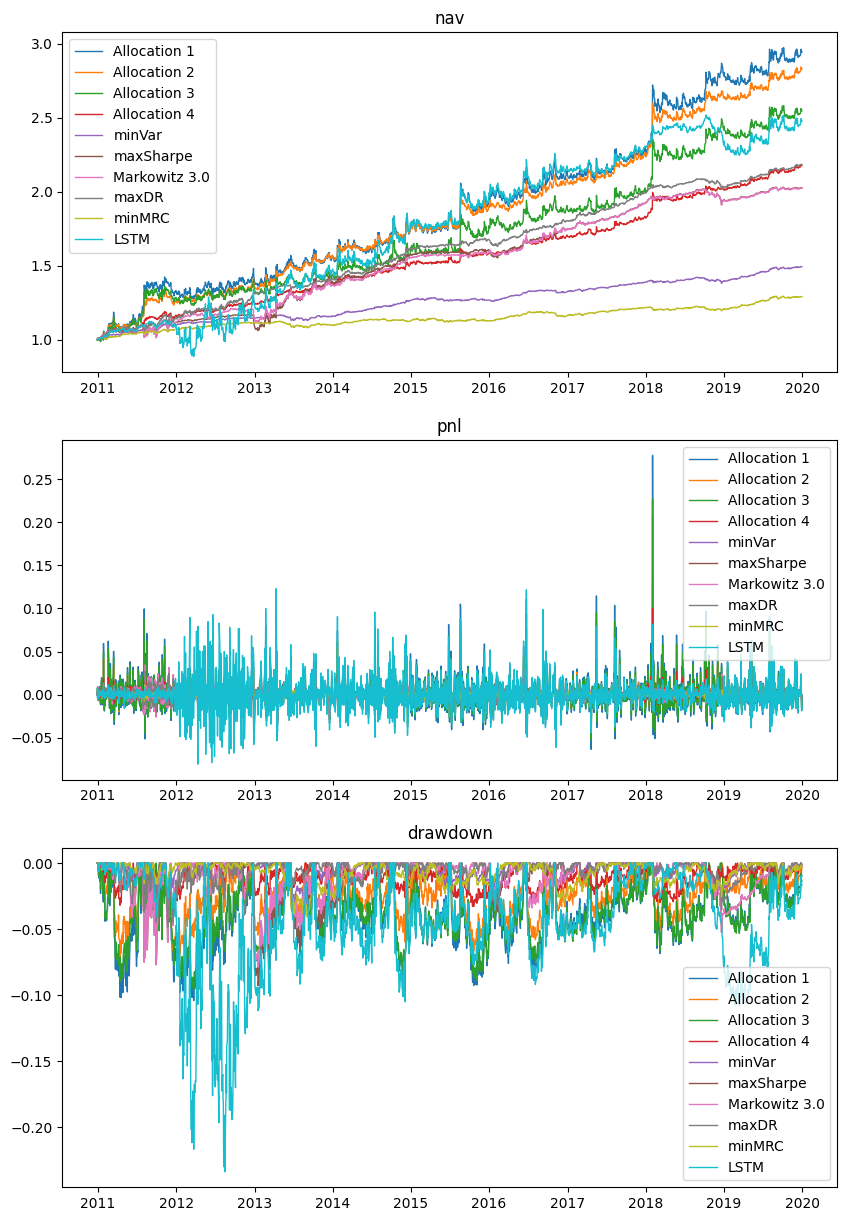

In [4]:
%%time
display_backtest_results(
    [weight_alloc_1, 
     weight_alloc_2, 
     weight_alloc_3, 
     weight_alloc_4,
     weight_variance,
     weight_sharpe,
     weight_markowitz3,
     weight_DR,
     weight_MRC,
     weight_LSTM, 
    ], 
    ["Allocation 1", "Allocation 2", "Allocation 3", "Allocation 4", "minVar", "maxSharpe", "Markowitz 3.0", "maxDR", "minMRC", "LSTM"])

# Improvement 1: loss function & L2 Reg

In [5]:
%%time

tf.keras.utils.set_random_seed(100)
# weight_LSTM_return = portfolio_paper.optimize("LSTM", loss = "return")
weight_LSTM_convex = portfolio_paper.optimize("LSTM", loss = "convex")
weight_LSTM_reg = portfolio_paper.optimize("LSTM", reg = True)
# weight_LSTM_sortino = portfolio_paper.optimize("LSTM", loss = "sortino")
# weight_LSTM_sortino_convex = portfolio_paper.optimize("LSTM", loss = "sortino_convex")

1/1 [==============================] - 0s 196ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 194ms/step
successfully optimized portfolio weights
CPU times: total: 16.4 s
Wall time: 32.8 s


# Improvement 2: Structural Change - Autoencoder

In [7]:
%%time

tf.keras.utils.set_random_seed(110)
weight_LSTM_autoencoder = portfolio_paper.optimize("LSTM",
                                                   loss = "convex", 
                                                   structure_change = "autoencoder")

1/1 [==============================] - 0s 241ms/step
successfully optimized portfolio weights
CPU times: total: 9.7 s
Wall time: 18.4 s


,LSTM_paper,LSTM_convex,LSTM_autoencoder_convex
avg annualized ret,0.163651,0.118853,0.079312
avg annualized std,0.300529,0.106810,0.070451
sharpe ratio,0.544543,1.112756,1.125787
adjusted sharpe ratio,0.554552,0.339082,0.977223
skewness,1.011333,1.879619,0.657321
excess kurtosis,5.941144,20.232902,4.834454
maximum drawdown,-0.233688,-0.061934,-0.085775
maximum drawdown length (days),207.000000,119.000000,618.000000
VaR (95%),-0.025564,-0.009311,-0.006835
CVaR (95%),-0.039597,-0.013148,-0.009385


CPU times: total: 1.55 s
Wall time: 3.15 s


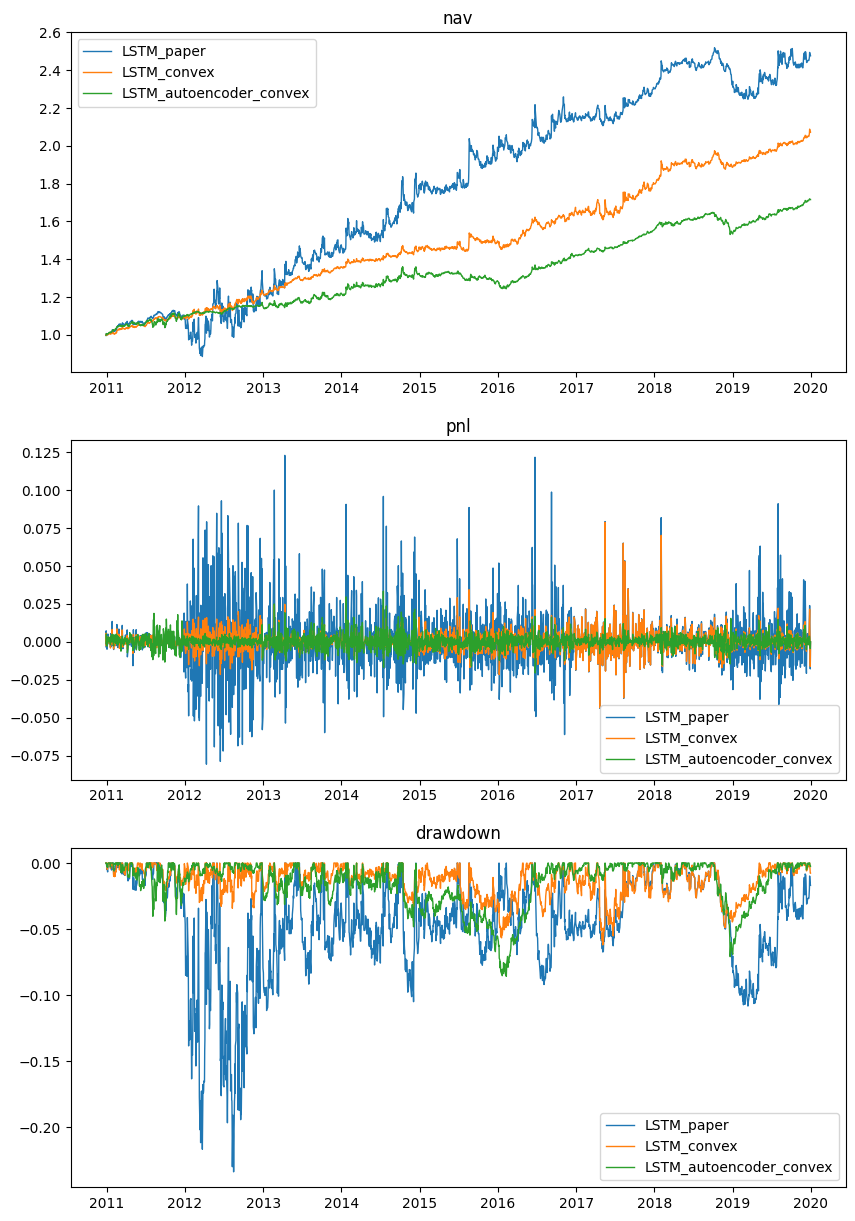

In [8]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_LSTM_convex,
     weight_LSTM_autoencoder,
    ],
    ["LSTM_paper", "LSTM_convex", "LSTM_autoencoder_convex"]
)

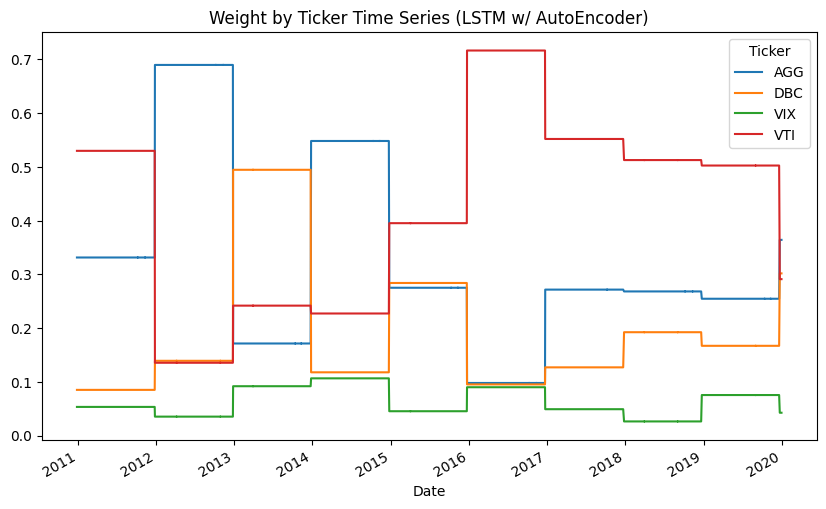

In [9]:
weight_LSTM_autoencoder.pivot(index='Date', columns='Ticker', values='Weight').plot(figsize=(10, 6))
plt.title('Weight by Ticker Time Series (LSTM w/ AutoEncoder)');

# Improvement 3: SAE_CNN_LSTM

In [10]:
%%time

tf.keras.utils.set_random_seed(100)
weight_CNN_SAE_LSTM = portfolio_paper.optimize("LSTM",
                                               loss = "convex", structure_change = "CNN_SAE_LSTM")

tf.keras.utils.set_random_seed(100)
weight_SAE_CNN_LSTM = portfolio_paper.optimize("LSTM",
                                               loss = "convex", structure_change = "SAE_CNN_LSTM")

tf.keras.utils.set_random_seed(100)
weight_SAE_3CNN_LSTM = portfolio_paper.optimize("LSTM",
                                                loss = "convex", structure_change = "SAE_3CNN_LSTM")

tf.keras.utils.set_random_seed(100)
weight_SAE_3CNN_LSTM_reg = portfolio_paper.optimize("LSTM",
                                                loss = "convex", structure_change = "SAE_3CNN_LSTM",
                                                reg = True)

1/1 [==============================] - 0s 219ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 270ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 253ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 260ms/step
successfully optimized portfolio weights
CPU times: total: 38.5 s
Wall time: 1min 24s


,LSTM_paper,CNN_SAE_LSTM,SAE_CNN_LSTM,SAE_3CNN_LSTM,SAE_3CNN_LSTM_reg
avg annualized ret,0.163651,0.065461,0.083401,0.067082,0.077856
avg annualized std,0.300529,0.096844,0.074806,0.042078,0.052788
sharpe ratio,0.544543,0.675938,1.114891,1.594236,1.474880
adjusted sharpe ratio,0.554552,0.572962,-0.261899,0.886907,1.033351
skewness,1.011333,1.681054,2.279320,-0.239217,0.579881
excess kurtosis,5.941144,17.950534,32.021864,3.589415,4.875622
maximum drawdown,-0.233688,-0.143079,-0.077807,-0.065759,-0.049860
maximum drawdown length (days),207.000000,804.000000,717.000000,420.000000,335.000000
VaR (95%),-0.025564,-0.008193,-0.006274,-0.003802,-0.004778
CVaR (95%),-0.039597,-0.012426,-0.009482,-0.006106,-0.007089


CPU times: total: 2.62 s
Wall time: 5.31 s


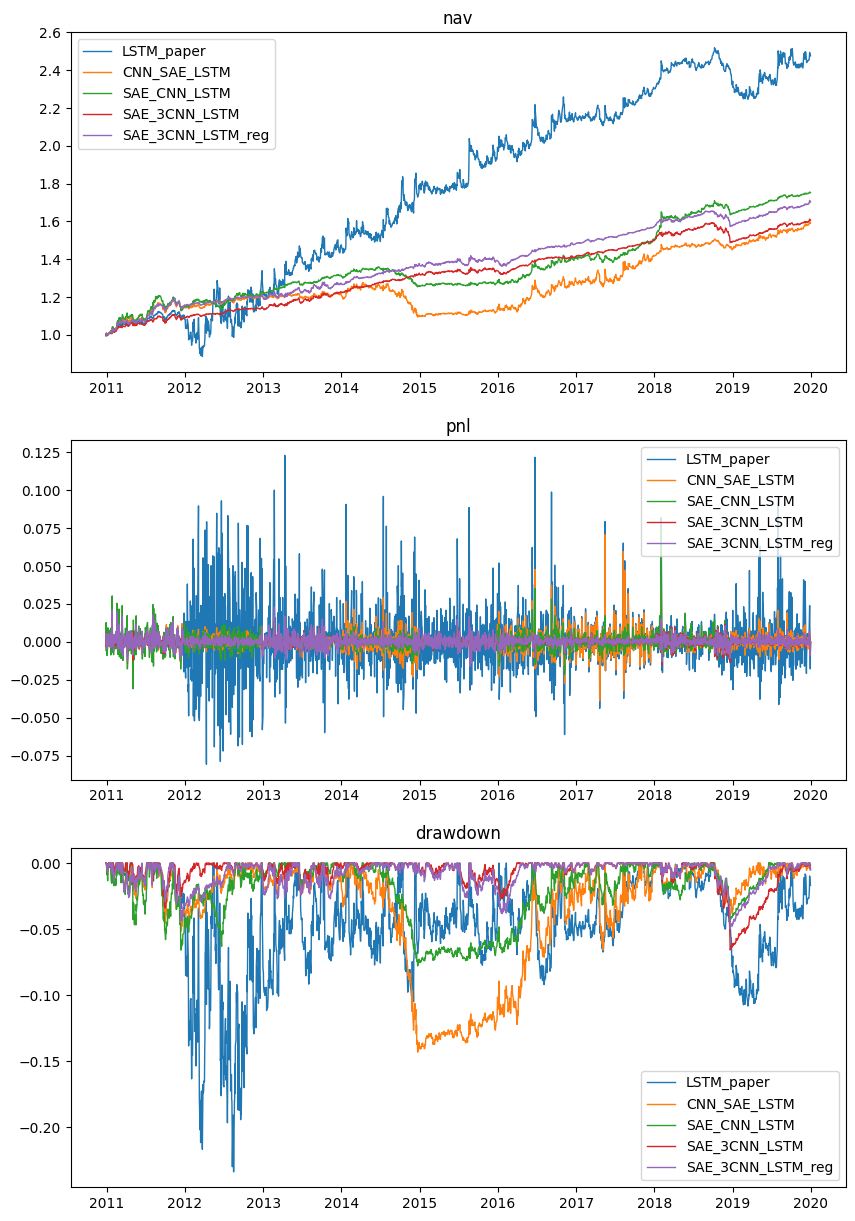

In [11]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_CNN_SAE_LSTM, 
     weight_SAE_CNN_LSTM,
     weight_SAE_3CNN_LSTM,
     weight_SAE_3CNN_LSTM_reg,
    ],
    ["LSTM_paper", "CNN_SAE_LSTM", "SAE_CNN_LSTM", "SAE_3CNN_LSTM", "SAE_3CNN_LSTM_reg"]
)

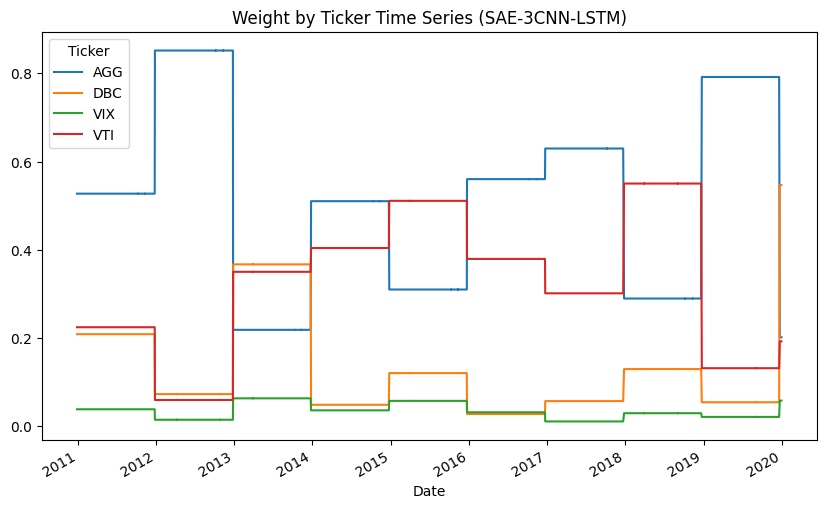

In [12]:
weight_SAE_3CNN_LSTM.pivot(index='Date', columns='Ticker', values='Weight').plot(figsize=(10, 6))
plt.title('Weight by Ticker Time Series (SAE-3CNN-LSTM)');

# Improvement 4: Double LSTM

In [13]:
%%time

tf.keras.utils.set_random_seed(100)
weight_DOUBLE_LSTM = portfolio_paper.optimize("LSTM", 
                                              loss = "convex", 
                                              structure_change = "DOUBLE_LSTM")  
weight_DOUBLE_LSTM_reg = portfolio_paper.optimize("LSTM", 
                                                  loss = "convex", 
                                                  structure_change = "DOUBLE_LSTM", 
                                                  reg= True)

1/1 [==============================] - 0s 202ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 237ms/step
successfully optimized portfolio weights
CPU times: total: 17.5 s
Wall time: 34.1 s


,LSTM_paper,DOUBLE_LSTM,DOUBLE_LSTM_reg
avg annualized ret,0.163651,0.118853,0.165988
avg annualized std,0.300529,0.106810,0.199295
sharpe ratio,0.544543,1.112756,0.832874
adjusted sharpe ratio,0.554552,0.339082,-1.209295
skewness,1.011333,1.879619,5.927774
excess kurtosis,5.941144,20.232902,113.301964
maximum drawdown,-0.233688,-0.061934,-0.100060
maximum drawdown length (days),207.000000,119.000000,673.000000
VaR (95%),-0.025564,-0.009311,-0.014517
CVaR (95%),-0.039597,-0.013148,-0.021338


CPU times: total: 1.59 s
Wall time: 3.19 s


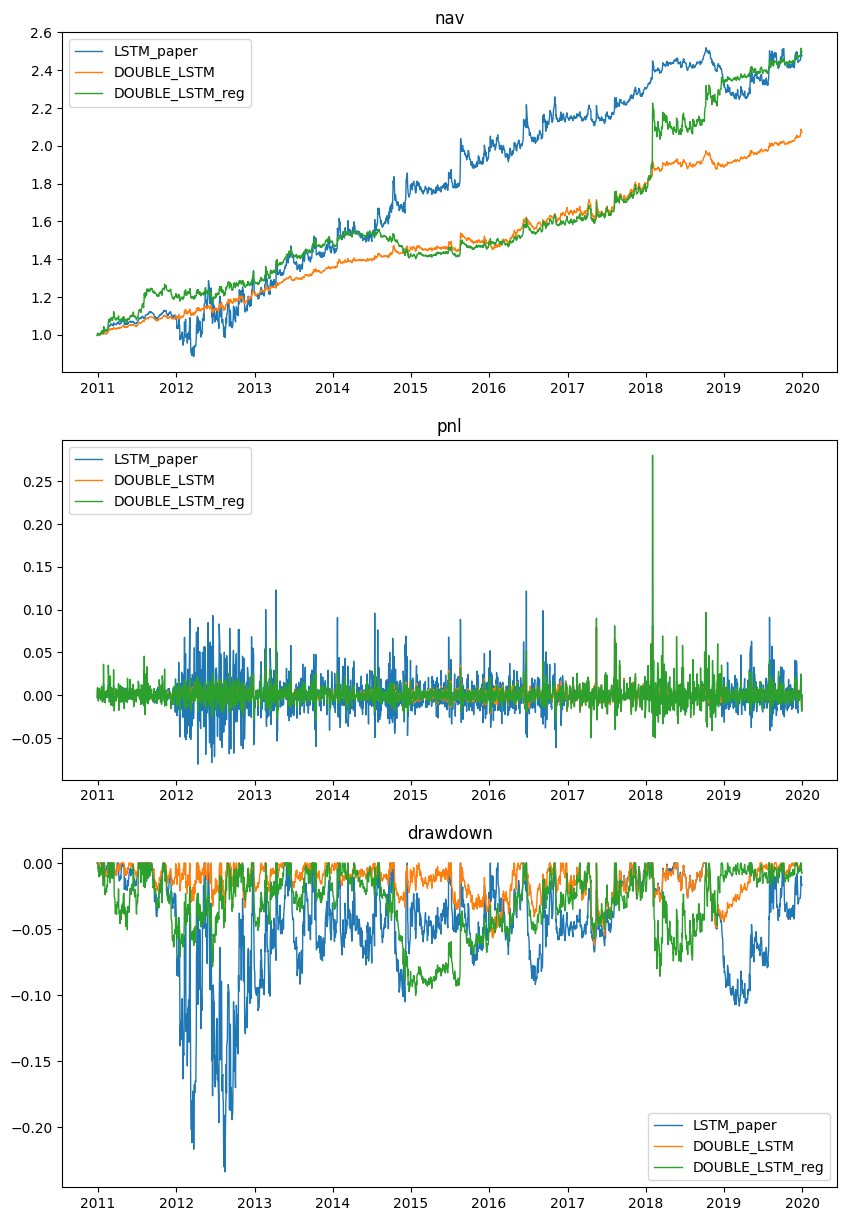

In [14]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_DOUBLE_LSTM,
     weight_DOUBLE_LSTM_reg
    ],
    ["LSTM_paper", "DOUBLE_LSTM", "DOUBLE_LSTM_reg"]
)